Created by Andy Ping

This script has several plotting script boxes that output machine parameters, could be used for stackers and reclaimers although some won't apply for stackers:
1. Total throughtput vs slew angle
2. Throughput rate at machine boom tip positions, given an LT, slew and luff input, with adjustable machine dimensions
3. Total throuhgput per bench
4. Overlayed total output at boom tip distance along rails, split into left and right yards

The data required for this script is:
1. Slew angle (slew_array)
2. Throughput rate in tonnes per second as opposed to tph to work with other data also in seconds (ton_array)
3. LT position (LT_array)
4. Luff angle (luff_array_)
5. Bench number (bench_array)

All of these need to be exported in .MAT format and imported here through the code. When exporting from Catman, format the names of the channels to be exactly as shown in the above list without including anything in the brackets.
This should mean that you just have to adjust the file path to your data and the files will import properly, becoming arrays named that of in the brackets (then the scripts should run without name alteration of the channels).

Each script will still require items to be modified to suit you where commented.

In [2]:
# Import required libraries
#%clear -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from matplotlib.ticker import MaxNLocator

In [ ]:
# Specify the absolute path to your .MAT file (slew angle data)

file_path1 = r'C:\Working Folder\2396 BV-BHP RC1 PIR\Data for Python\Slew Position_1Hz.MAT'  # Update this with your actual file path

# Load the .MAT file
mat_data1 = loadmat(file_path1)

# Display the keys (variable names) in the .MAT file (machine position data)
print("Variables in the .MAT file:")
for key in mat_data1.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data1[key].shape if hasattr(mat_data1[key], 'shape') else type(mat_data1[key])}")

# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
slew_array = mat_data1['Channel_1_Data'] 

# Convert to numpy arrays if not already
slew_array = np.array(slew_array).flatten()

print(f"\nData shape: {slew_array.shape}")
print(f"Data range: [{slew_array.min():.2f}, {slew_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (7776009, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (7776009,)
Data range: [-162.80, 164.46]


In [ ]:
# Specify the absolute path to your .MAT file (tonnage data, this needs to be in tonnes per second to work with the other channels, which are also in seconds)

file_path2 = r'C:\Working Folder\2396 BV-BHP RC1 PIR\Data for Python\TPS_1Hz.MAT'  # Update this with your actual file path
# Load the .MAT file
mat_data2 = loadmat(file_path2)

# Display the keys (variable names) in the .MAT file
print("Variables in the .MAT file:")
for key in mat_data2.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data2[key].shape if hasattr(mat_data2[key], 'shape') else type(mat_data2[key])}")

# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
ton_array = mat_data2['Channel_1_Data'] 

# Convert to numpy arrays if not already
ton_array = np.array(ton_array).flatten()

print(f"\nData shape: {ton_array.shape}")
print(f"Data range: [{ton_array.min():.2f}, {ton_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (7776009, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (7776009,)
Data range: [0.00, 6.67]


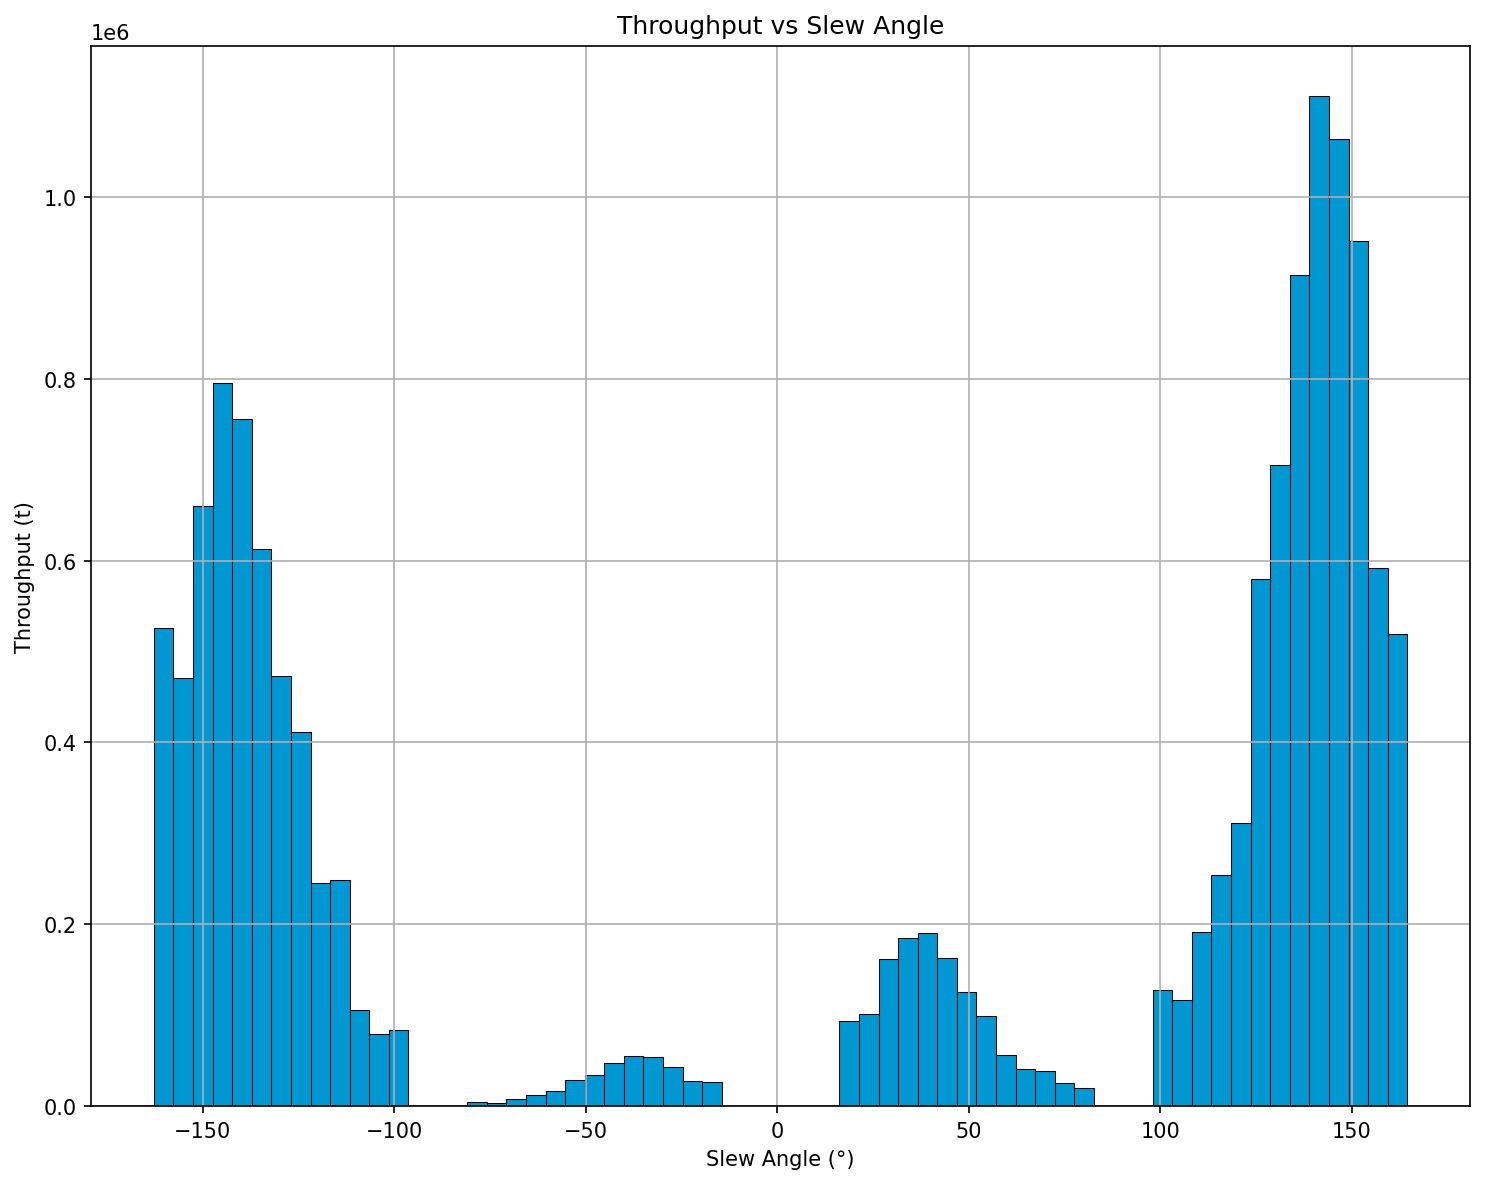

In [6]:
# Generating histogram to visualize output at slew angles

N_BINS = 64 # Number of bins for histogram
ymin, ymax = np.min(slew_array), np.max(slew_array)
bins = np.linspace(ymin, ymax, N_BINS + 1)

# Plotting
plt.figure(figsize=(10, 8), dpi=150)
plt.hist(
    slew_array,
    bins=bins,
    color="#0097D3",
    weights=ton_array,
    alpha=1,
    edgecolor='black',
    linewidth=0.5)
plt.xlabel("Slew Angle (°)")
plt.ylabel("Throughput (t)")
plt.title("Throughput vs Slew Angle")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Specify the absolute path to .MAT file machine position (LT Position data)

file_path3 = r'C:\Working Folder\2396 BV-BHP RC1 PIR\Data for Python\LT Position_1Hz.MAT'  # Update this with your actual file path

# Load the .MAT file
mat_data3 = loadmat(file_path3)

# Display the keys (variable names) in the .MAT file
print("Variables in the .MAT file:")
for key in mat_data3.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data3[key].shape if hasattr(mat_data3[key], 'shape') else type(mat_data3[key])}")

# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
LT_array = mat_data3['Channel_1_Data'] 

# Convert to numpy arrays if not already
LT_array = np.array(LT_array).flatten()

print(f"\nData shape: {LT_array.shape}")
print(f"Data range: [{LT_array.min():.2f}, {LT_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (7776009, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (7776009,)
Data range: [-7.48, 1252.51]


In [8]:
# Specify the absolute path to .MAT file machine position (luff angle data)

file_path4 = r'C:\Working Folder\2396 BV-BHP RC1 PIR\Data for Python\Luff Angle_1Hz.MAT'  # Update this with your actual file path

# Load the .MAT file
mat_data4 = loadmat(file_path4)

# Display the keys (variable names) in the .MAT file
print("Variables in the .MAT file:")
for key in mat_data4.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data4[key].shape if hasattr(mat_data4[key], 'shape') else type(mat_data4[key])}")

# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
luff_array = mat_data4['Channel_1_Data'] 

# Convert to numpy arrays if not already
luff_array = np.array(luff_array).flatten()

print(f"\nData shape: {luff_array.shape}")
print(f"Data range: [{luff_array.min():.2f}, {luff_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (7776009, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (7776009,)
Data range: [-13.19, 6.65]


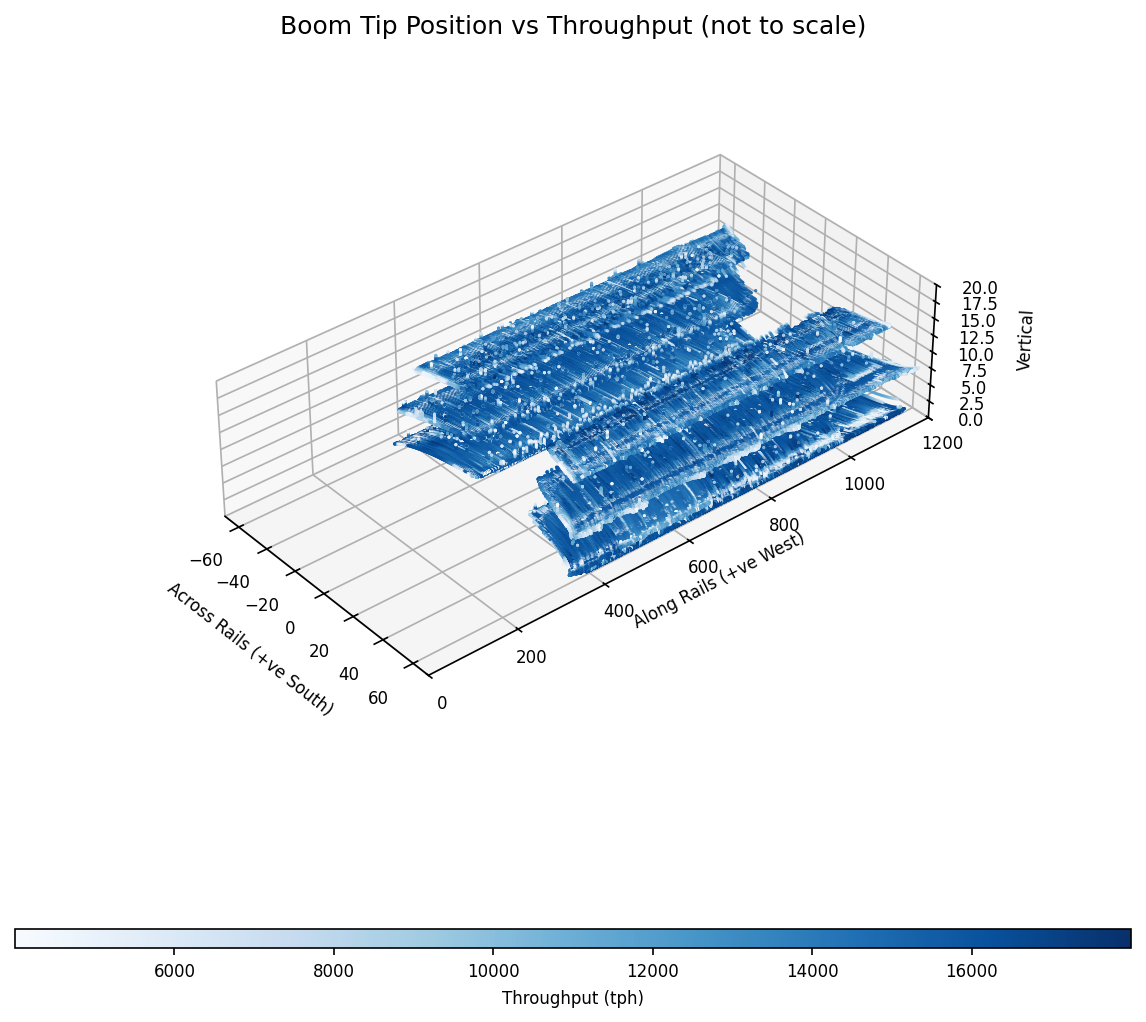

: 

In [ ]:
# Plotting machine boom tip positions vs throughput as a heat map. Data arrays should be imported and defined already

# Convert angles to radians if needed
from matplotlib.colors import LinearSegmentedColormap


slew_rad = np.deg2rad(slew_array - 90) #depending on your data you might not need the -90 adjustment
luff_rad = np.deg2rad(luff_array)

# Boom geometry
L = 60.0    # boom length
r_p = 3.2   # boom pivot offset
H = 14      # boom pivot height (bw height at luff = 0°)

# Compute boom tip coordinates (element-wise arrays)
x = r_p*np.cos(slew_rad) + L*np.cos(luff_rad)*np.cos(slew_rad)
y = LT_array + r_p*np.sin(slew_rad) + L*np.cos(luff_rad)*np.sin(slew_rad)
z = H + L*np.sin(luff_rad)

# Filter low and high tonnage values for better visualization and convert to tonnes per hour from tonnes per second. Adjust as needed
ton_masked1 = np.ma.masked_less(ton_array*3600, 4000)   
ton_masked = np.ma.masked_greater(ton_masked1, 18000)

# 3D scatter plot with heatmap colours
do_expensive_plots = True                                                # This is a toggle to turn on/off the 3D plotting, when working on other plots, as it can be slow plotting large datasets
if do_expensive_plots:
    fig = plt.figure(figsize=(12, 9), dpi=150)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-70, 70)      # X axis → across rails
    ax.set_ylim(0, 1200)      # Y axis → along rails
    ax.set_zlim(0, 20)       # Z axis → height
   
    p = ax.scatter(x, y, z, c = ton_masked, cmap="viridis", s=0.2)   # plotting boom tip positions coloured by tonnage
    ax.view_init(elev=35, azim=-40)  # adjusts viewing angles of plot
    ax.set_box_aspect([10, 20, 5])     # adjusts aspect ratio of axes
    ax.set_position([0.05, 0.05, 0.95, 0.95])   # adjusts how much of the figure the axes occupy (Start 0.02 from left, 0.02 from bottom, goes for 0.96 width, 0.96 height)

    # Axis labels
    ax.set_xlabel("Across Rails (+ve South)", fontsize=8) # Adjust labels and formatting as needed
    ax.set_ylabel("Along Rails (+ve West)", fontsize=8)
    ax.set_zlabel("Vertical", fontsize=8)
    ax.tick_params(labelsize=8)
    ax.set_title("Boom Tip Position vs Throughput (not to scale)")

    # Colorbar on bottom
    cbar = plt.colorbar(p, ax=ax, pad=0.15, shrink=0.8, location='bottom', aspect=60)
    cbar.set_label("Throughput (tph)", fontsize=8)
    cbar.ax.tick_params(labelsize=8)

    plt.show()

In [ ]:
# Specify the absolute path to your .MAT file (bench data)

file_path5 = r'C:\Working Folder\2396 BV-BHP RC1 PIR\Data for Python\Bench_1Hz.MAT'  # Update this with your actual file path

# Load the .MAT file
mat_data5 = loadmat(file_path5)

# Display the keys (variable names) in the .MAT file (machine position data)
print("Variables in the .MAT file:")
for key in mat_data5.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data5[key].shape if hasattr(mat_data5[key], 'shape') else type(mat_data5[key])}")

# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
bench_array = mat_data5['Channel_1_Data'] 

# Convert to numpy arrays if not already
bench_array = np.array(bench_array).flatten()

print(f"\nData shape: {bench_array.shape}")
print(f"Data range: [{bench_array.min():.2f}, {bench_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (7776009, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (7776009,)
Data range: [1.00, 3.00]


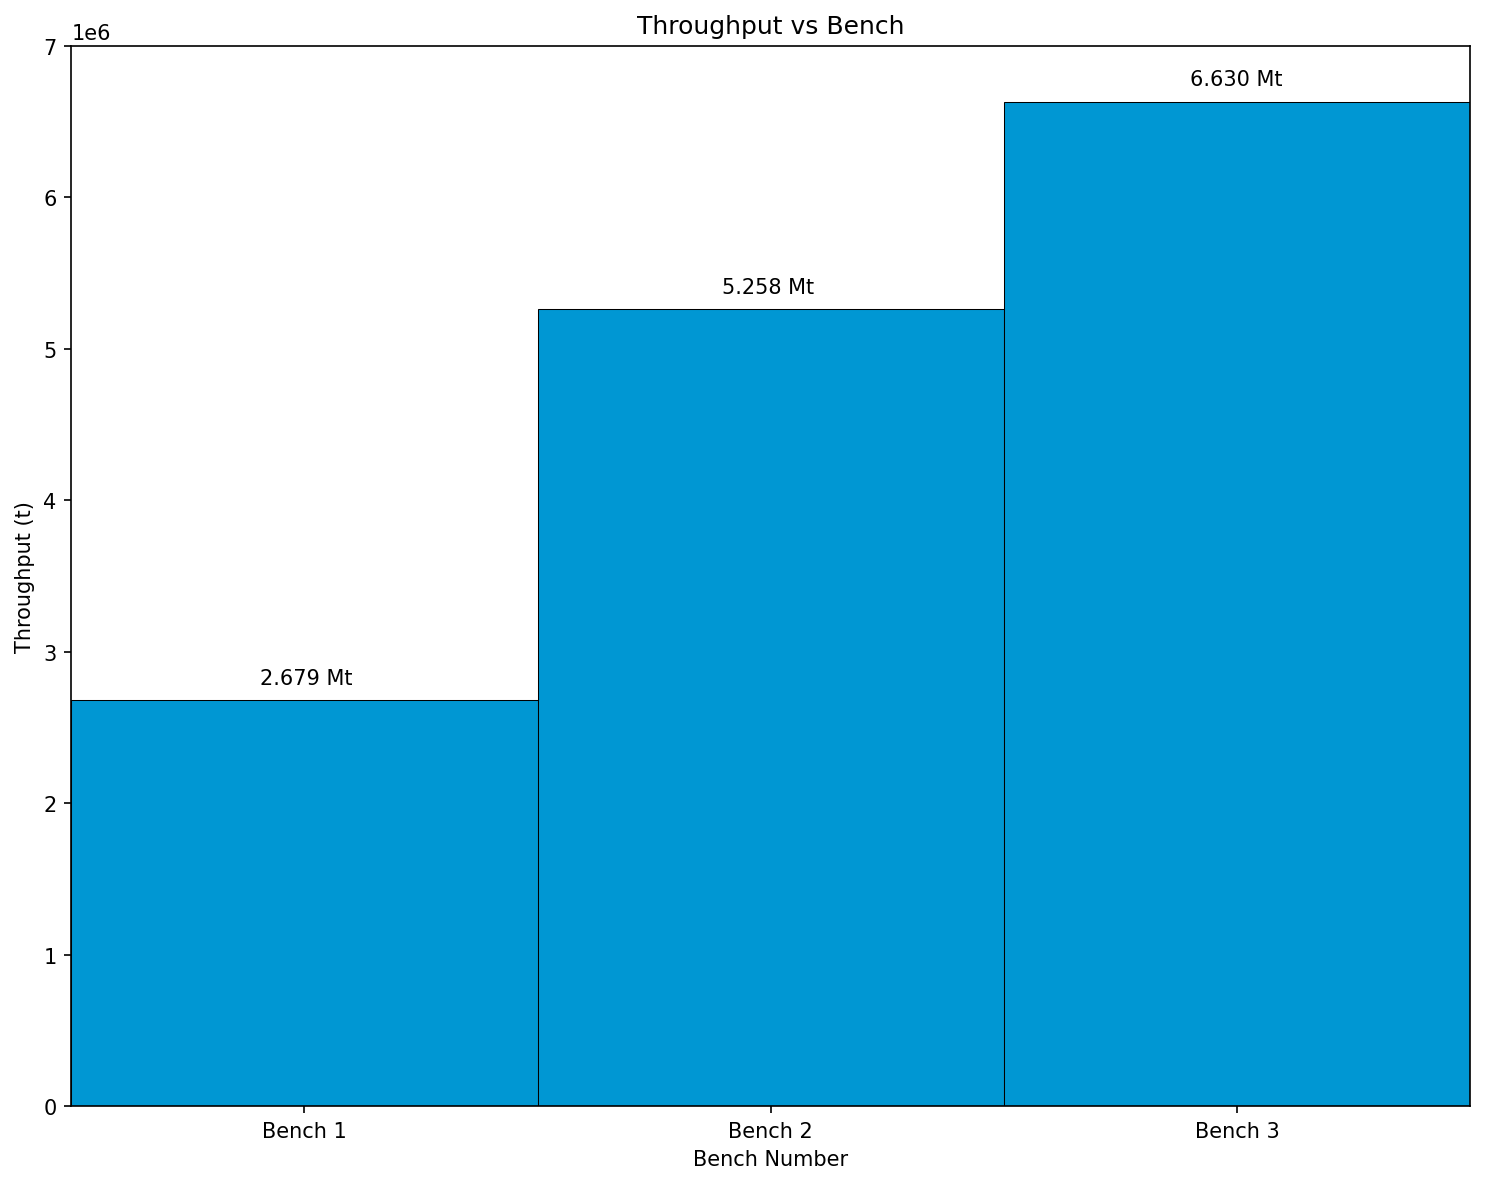

In [10]:
# Generating histogram to visualize output at bench numbers

N_BINS = 3
ymin, ymax = np.min(bench_array), np.max(bench_array)
bins = np.linspace(ymin, ymax, N_BINS + 1)
ylim = 7000000      #set y limit of plot here

# Bin height calculation for text labels
counts, bin_edges = np.histogram(
    bench_array,
    bins=bins,
    weights=ton_array
)
for i in range(len(counts)):
    bin_start = bin_edges[i]
    bin_end   = bin_edges[i+1]
    height    = counts[i]

# Plotting
plt.figure(figsize=(10, 8), dpi=150)
plt.hist(
    bench_array,
    bins=bins,
    weights=ton_array,
    color="#0097D3",
    label="Left yard (slew ≤ 0)",  #axis label
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel("Bench Number") # Update labels as needed
plt.ylabel("Throughput (t)")
plt.title("Throughput vs Bench")
plt.xticks(ticks=[1.3333333, 2, 2.666667], labels=['Bench 1', 'Bench 2', 'Bench 3'])
plt.xlim(1, 3)
plt.ylim(0, ylim)
plt.tight_layout()
plt.text(0.135, (counts[0]/ylim)+0.015, "2.679 Mt", transform=plt.gca().transAxes)   #labels above bars should automatically position based on bar height, update values manually
plt.text(0.465, (counts[1]/ylim)+0.015, "5.258 Mt", transform=plt.gca().transAxes)   
plt.text(0.8, (counts[2]/ylim)+0.0155, "6.630 Mt", transform=plt.gca().transAxes)   
plt.show()

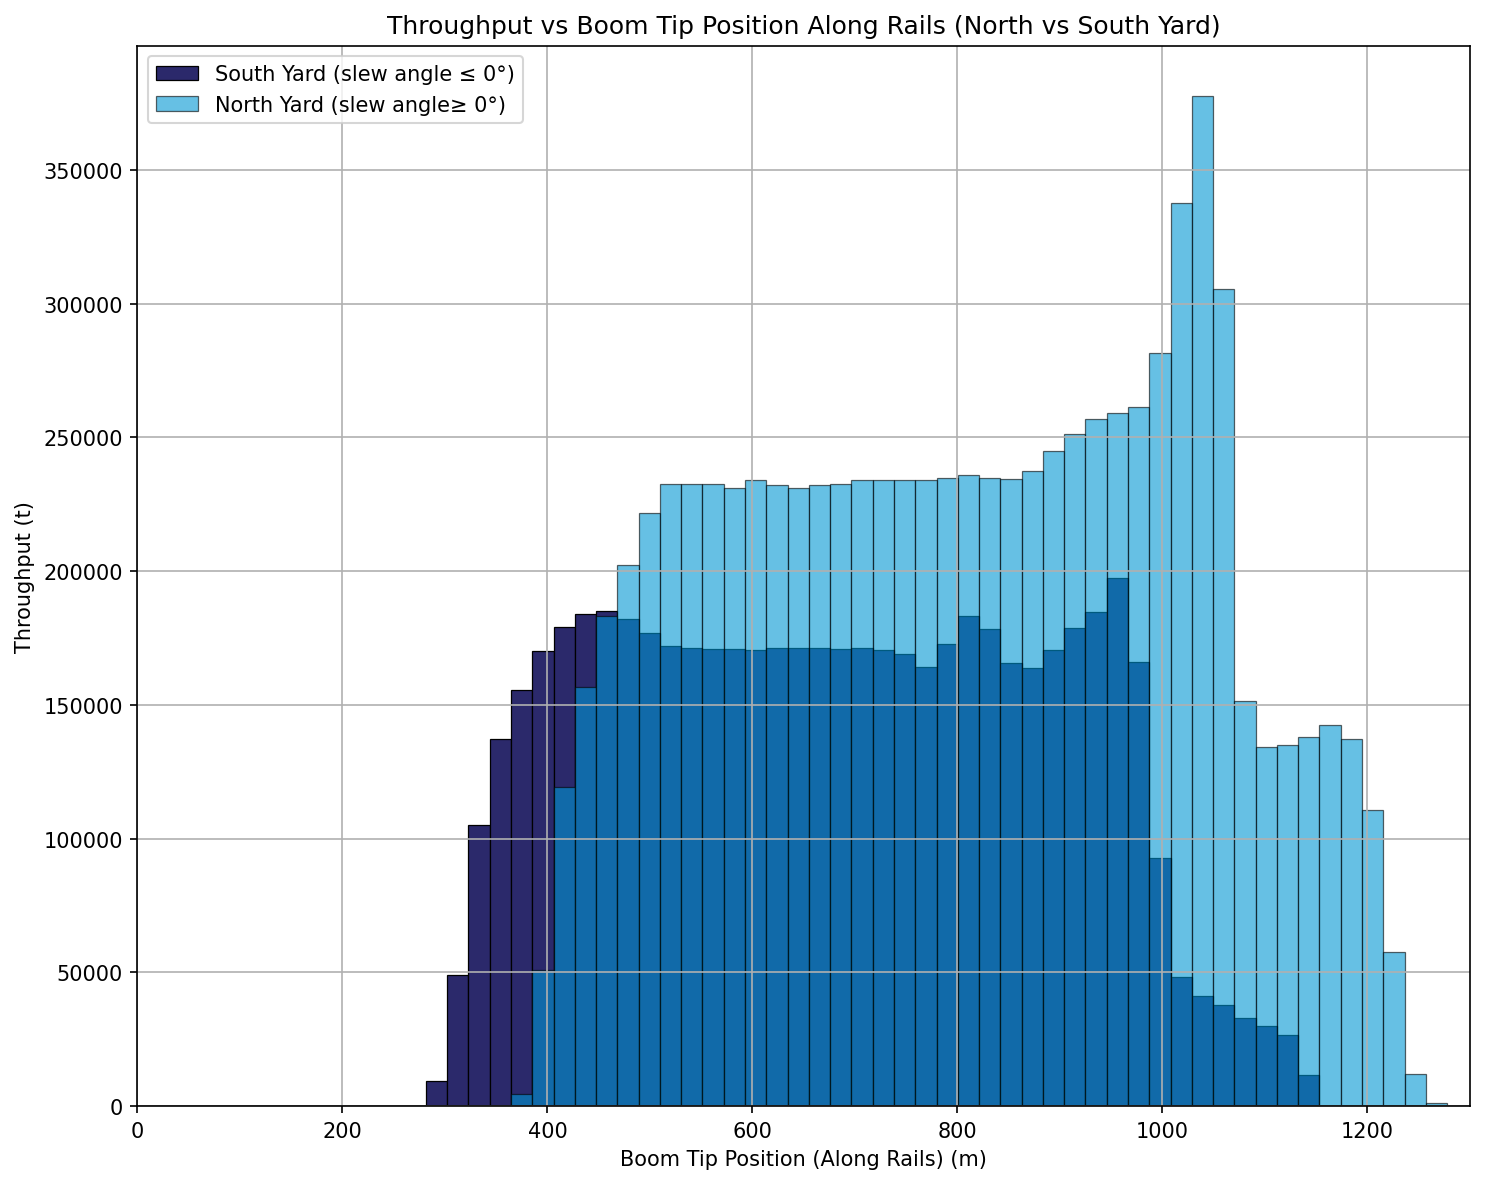

In [18]:
# Generating histogram to visualize output at boom tip positions along rails (including stockpile sides)
# Creates 2 plots overalpping, y and y2 for boom tip distance along rails, split by slew direction (left or right)

# BOOM GEOMETRY
L = 60.0   # boom length
r_p = 3.2  # boom pivot offset

# INPUT ARRAYS (FULL DATASET)
LT_array  = np.asarray(LT_array)
slew_deg  = np.asarray(slew_array)
luff_deg  = np.asarray(luff_array)
ton_array = np.asarray(ton_array)

# ANGLES → RADIANS
slew_rad = np.deg2rad(slew_deg)
luff_rad = np.deg2rad(luff_deg)

# BOOM TIP Y POSITION (YARD DISTANCE)
y_tip = (
    LT_array
    + r_p * np.sin(slew_rad)
    + L * np.cos(luff_rad) * np.sin(slew_rad))

# LEFT / RIGHT YARD MASKS
left_mask  = slew_deg <= 0
right_mask = slew_deg >= 0
y_left   = y_tip[left_mask]
ton_left = ton_array[left_mask]
y_right   = y_tip[right_mask]
ton_right = ton_array[right_mask]

# BINNING (COMMON FOR BOTH)
N_BINS = 64
ymin, ymax = np.min(y_tip), np.max(y_tip)
bins = np.linspace(ymin, ymax, N_BINS + 1)

# WEIGHTED HISTOGRAM
plt.figure(figsize=(10, 8), dpi=150)
plt.hist(
    y_left,
    bins=bins,
    weights=ton_left,
    color="#2B296B",
    alpha=1,
    label="South Yard (slew angle ≤ 0°)",
    edgecolor='black',
    linewidth=0.6,
)
plt.hist(
    y_right,
    bins=bins,
    weights=ton_right,
    color="#0097D3",
    alpha=0.6,
    label="North Yard (slew angle≥ 0°)",
    edgecolor='black',
    linewidth=0.6,
)
plt.xlim(0, 1300)
plt.xlabel("Boom Tip Position (Along Rails) (m)")
plt.ylabel("Throughput (t)")
plt.title("Throughput vs Boom Tip Position Along Rails (North vs South Yard)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Calculate total LT distance travelled

distance = np.sum(np.abs(np.diff(LT_array))/1000)
print(f"Total LT distance travelled: {distance:.3f} km")

Total LT distance travelled: 168.452 km


In [12]:
# Calculate throughput statistics

throughput_mean = np.mean(ton_array)*3600  # Convert to tph
print(f"Mean Throughput: {throughput_mean:.2f} tph")
throughput_max = np.max(ton_array)*3600  # Convert to tph
print(f"Max Throughput: {throughput_max:.2f} tph")
throughput_mode = pd.Series(ton_array*3600).mode()[0]  # Convert to tph
print(f"Mode Throughput: {throughput_mode:.2f} tph")

Mean Throughput: 6744.34 tph
Max Throughput: 24000.00 tph
Mode Throughput: 0.00 tph


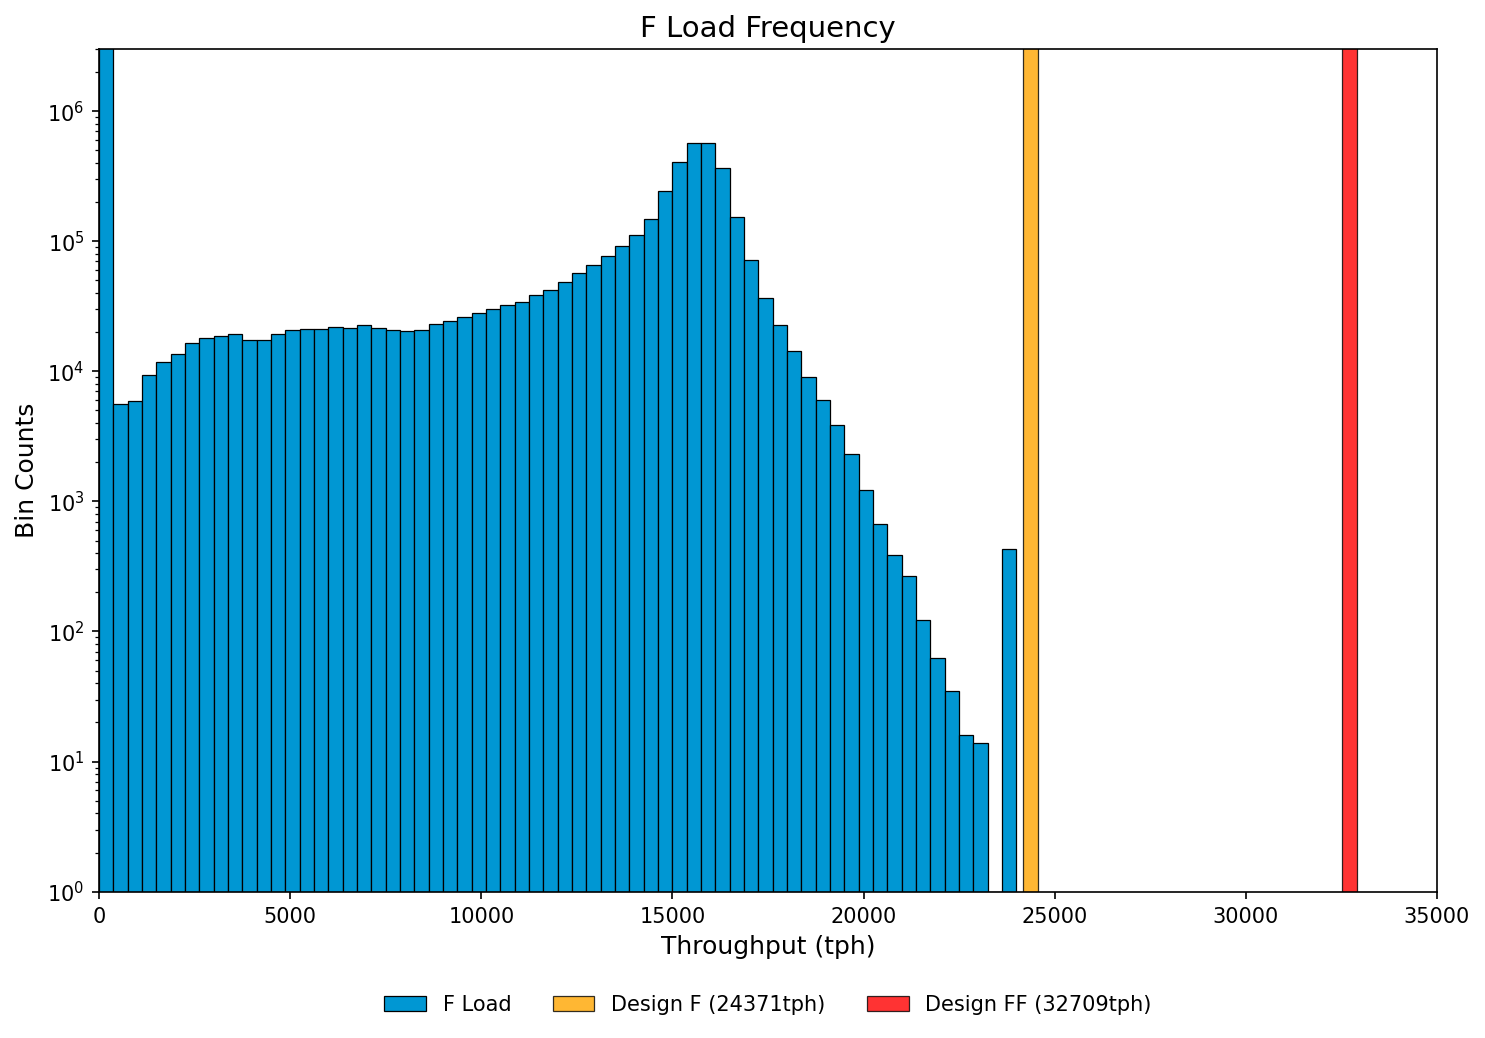

In [29]:
fig, ax = plt.subplots(figsize=(10,7), dpi=150)

designF = 24371   #update design values here
designFF = 32709

ax.set_title('F Load Frequency', fontsize=14)
ax.set_xlabel('Throughput (tph)', fontsize=12)
ax.set_ylabel('Bin Counts', fontsize=12)

manual_bar1 = {
    "x": designF,           # x location of the bar
    "height": 4000000,      # y value (height)
    "width": 400,      # bar width
    "color": "Orange",
    "alpha": 0.8,
    "label": f"Design F ({designF}tph)"
}

manual_bar2 = {
    "x": designFF,           # x location of the bar
    "height": 4000000,      # y value (height)
    "width": 400,      # bar width
    "color": "Red",
    "alpha": 0.8,
    "label": f"Design FF ({designFF}tph)"
}

ax.bar(manual_bar1["x"], manual_bar1["height"], width=manual_bar1["width"], color=manual_bar1["color"], alpha=manual_bar1["alpha"], label=manual_bar1["label"], edgecolor="black", linewidth=0.6)
ax.bar(manual_bar2["x"], manual_bar2["height"], width=manual_bar2["width"], color=manual_bar2["color"], alpha=manual_bar2["alpha"], label=manual_bar2["label"], edgecolor="black", linewidth=0.6)

ax.hist(ton_array*3600, bins=64, color="#0097D3",  edgecolor="black", linewidth=0.6, label="F Load")  #update bins here
ax.set_xlim(0, 35000)
ax.set_ylim(1, 3e6)
ax.set_yscale('log')
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=10,
    frameon=False
)
plt.tight_layout()
plt.show()

In [ ]:
# Specify the absolute path to your .MAT file (U force data)

file_path5 = r'C:\Working Folder\2396 BV-BHP RC1 PIR\Data for Python\U Force_1Hz.MAT'  # Update this with your actual file path
# Load the .MAT file
mat_data5 = loadmat(file_path5)

# Display the keys (variable names) in the .MAT file (machine position data)
print("Variables in the .MAT file:")
for key in mat_data5.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data5[key].shape if hasattr(mat_data5[key], 'shape') else type(mat_data5[key])}")

# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
U_array = mat_data5['Channel_1_Data'] 

# Convert to numpy arrays if not already
U_array = np.array(U_array).flatten()

print(f"\nData shape: {U_array.shape}")
print(f"Data range: [{U_array.min():.2f}, {U_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (4181233, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (4181233,)
Data range: [0.00, 326.99]


Percentage over U: 0.01% Percentage over UU: 0.00%
897 111


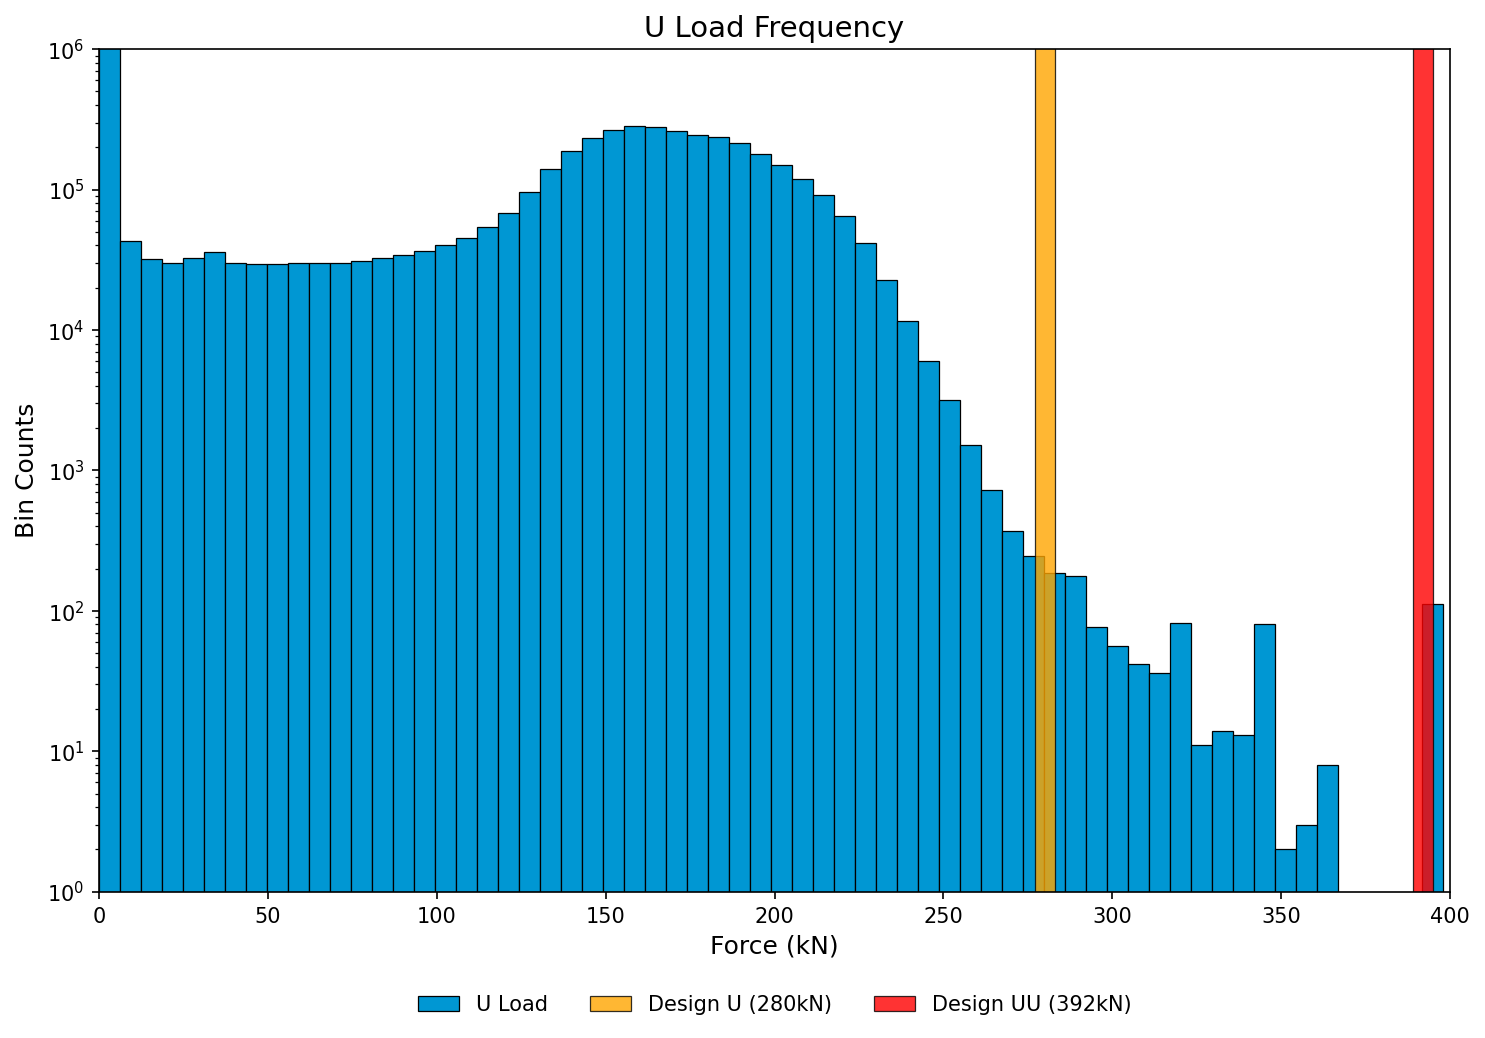

In [ ]:
designU = 280   #update design values here
designUU = 392

countU = np.sum(U_array > designU)
countUU = np.sum(U_array > designUU)
print(f"Percentage over U: {countU/U_array.size*100:.2f}%", f"Percentage over UU: {countUU/U_array.size*100:.2f}%")
print(countU, countUU)

fig, ax = plt.subplots(figsize=(10,7), dpi=150)

ax.set_title('U Load Frequency', fontsize=14)
ax.set_xlabel('Force (kN)', fontsize=12)
ax.set_ylabel('Bin Counts', fontsize=12)

manual_bar1 = {
    "x": designU,           # x location of the bar
    "height": 2100000,      # y value (height)
    "width": 6,      # bar width
    "color": "Orange",
    "alpha": 0.8,
    "label": f"Design U ({designU}kN)"
}

manual_bar2 = {
    "x": designUU,           # x location of the bar
    "height": 2100000,      # y value (height)
    "width": 6,      # bar width
    "color": "Red",
    "alpha": 0.8,
    "label": f"Design UU ({designUU}kN)"
}
ax.hist(U_array, bins=64, color="#0097D3",edgecolor="black", linewidth=0.6, label="U Load")   #update bins here
ax.bar(manual_bar1["x"], manual_bar1["height"], width=manual_bar1["width"], color=manual_bar1["color"], alpha=manual_bar1["alpha"], label=manual_bar1["label"], edgecolor="black", linewidth=0.6)
ax.bar(manual_bar2["x"], manual_bar2["height"], width=manual_bar2["width"], color=manual_bar2["color"], alpha=manual_bar2["alpha"], label=manual_bar2["label"], edgecolor="black", linewidth=0.6)
ax.set_xlim(0, 400)
ax.set_ylim(1, 1e6)
ax.set_yscale('log')
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=10,
    frameon=False
)
plt.tight_layout()
plt.show()

In [ ]:
# Specify the absolute path to your .MAT file (S force data)

file_path5 = r'C:\Working Folder\2396 BV-BHP RC1 PIR\Data for Python\S Force_1Hz.MAT'  # Update this with your actual file path

# Load the .MAT file
mat_data5 = loadmat(file_path5)

# Display the keys (variable names) in the .MAT file (machine position data)
print("Variables in the .MAT file:")
for key in mat_data5.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data5[key].shape if hasattr(mat_data5[key], 'shape') else type(mat_data5[key])}")

# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
S_array = mat_data5['Channel_1_Data'] 

# Convert to numpy arrays if not already
S_array = np.array(S_array).flatten()

print(f"\nData shape: {S_array.shape}")
print(f"Data range: [{S_array.min():.2f}, {S_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (7776009, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (7776009,)
Data range: [-99.28, 102.28]


Percentage over S: 0.00% Percentage over SS: 0.00%


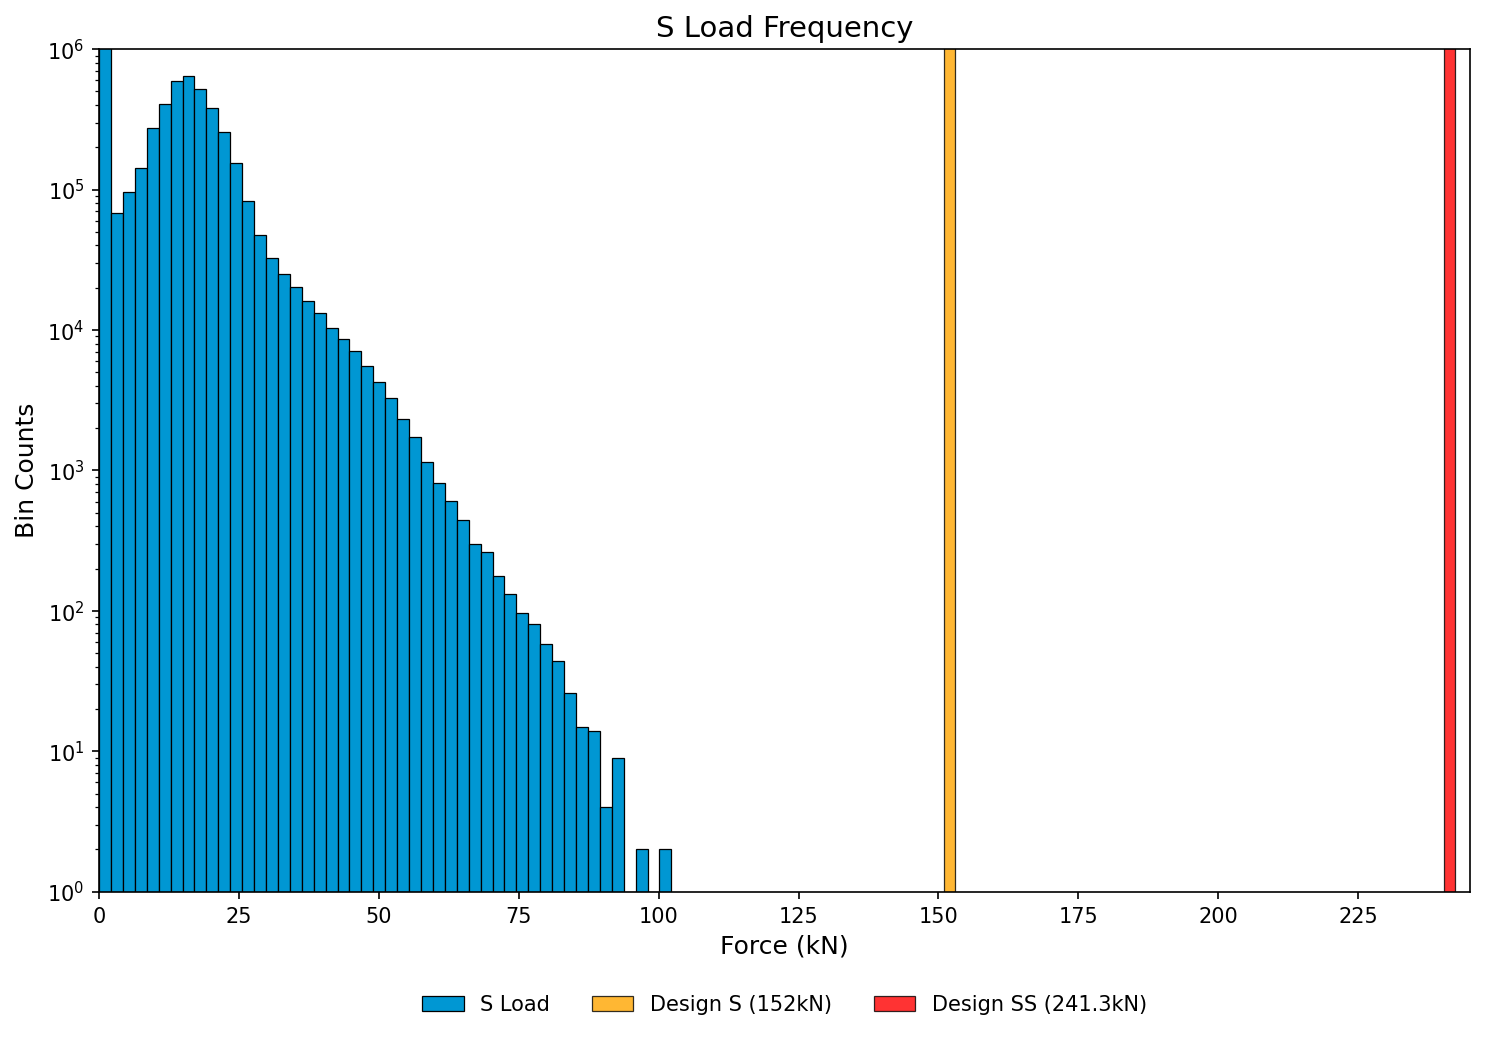

In [26]:
fig, ax = plt.subplots(figsize=(10,7), dpi=150)

designS = 152   #update design values here
designSS = 241.3

abs_S_array = np.abs(S_array)

countS = np.sum(abs_S_array > designS)
countSS = np.sum(abs_S_array > designSS)
print(f"Percentage over S: {countS/S_array.size*100:.2f}%", f"Percentage over SS: {countSS/S_array.size*100:.2f}%")

ax.set_title('S Load Frequency', fontsize=14)
ax.set_xlabel('Force (kN)', fontsize=12)
ax.set_ylabel('Bin Counts', fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))   #Set x-axis to have 12 ticks, adjust as needed


manual_bar1 = {
    "x": designS,           # x location of the bar
    "height": 2100000,      # y value (height)
    "width": 2,      # bar width
    "color": "Orange",
    "alpha": 0.8,
    "label": f"Design S ({designS}kN)"
}

manual_bar2 = {
    "x": designSS,           # x location of the bar
    "height": 2100000,      # y value (height)
    "width": 2,      # bar width
    "color": "Red",
    "alpha": 0.8,
    "label": f"Design SS ({designSS}kN)"
}
ax.hist(abs_S_array, bins=48, color="#0097D3",edgecolor="black", linewidth=0.6, label="S Load")   #update bins here
ax.bar(manual_bar1["x"], manual_bar1["height"], width=manual_bar1["width"], color=manual_bar1["color"], alpha=manual_bar1["alpha"], label=manual_bar1["label"], edgecolor="black", linewidth=0.6)
ax.bar(manual_bar2["x"], manual_bar2["height"], width=manual_bar2["width"], color=manual_bar2["color"], alpha=manual_bar2["alpha"], label=manual_bar2["label"], edgecolor="black", linewidth=0.6)
ax.set_xlim(0, 245)
ax.set_ylim(1, 1e6)
ax.set_yscale('log')
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=10,
    frameon=False
)
plt.tight_layout()
plt.show()